In [189]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [190]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('/content/diabetes.csv')

In [191]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [192]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [193]:
# getting the statistical measures of the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [194]:
# checking for missing values in each column
diabetes_dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [195]:
diabetes_dataset['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


0 represents Non Diabetic



1 represents Diabetic


In [196]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Visualizations

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

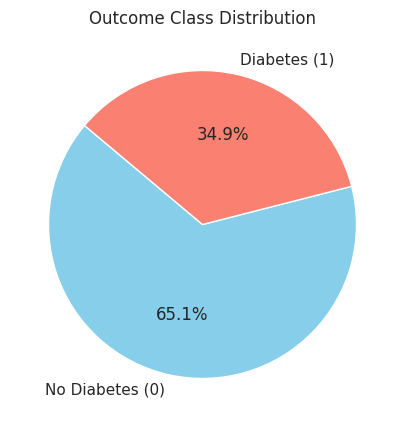

In [198]:
# Count class labels
counts = diabetes_dataset['Outcome'].value_counts()
labels = ['No Diabetes (0)', 'Diabetes (1)']

# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=['skyblue', 'salmon'], startangle=140)
plt.title('Outcome Class Distribution')
plt.show()


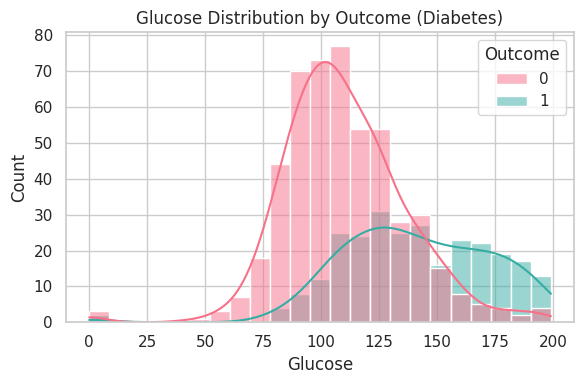

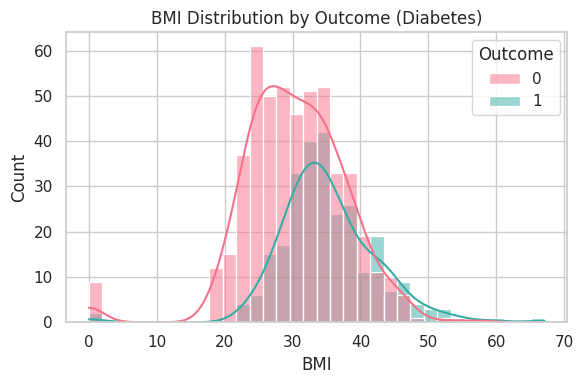

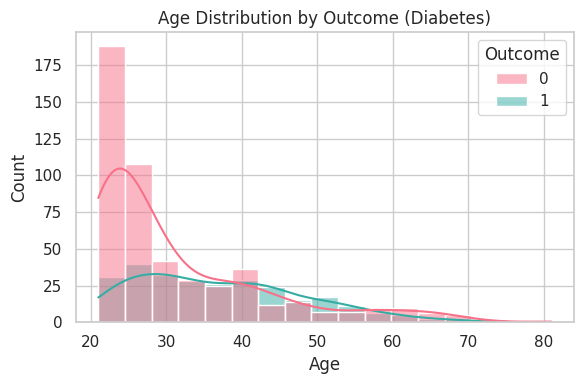

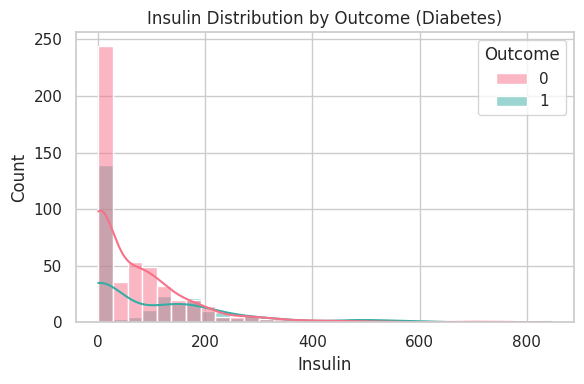

In [226]:
# For Diabetes Dataset
important_features = ['Glucose', 'BMI', 'Age', 'Insulin']

for col in important_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=diabetes_dataset, x=col, hue='Outcome', kde=True, palette='husl')
    plt.title(f'{col} Distribution by Outcome (Diabetes)')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


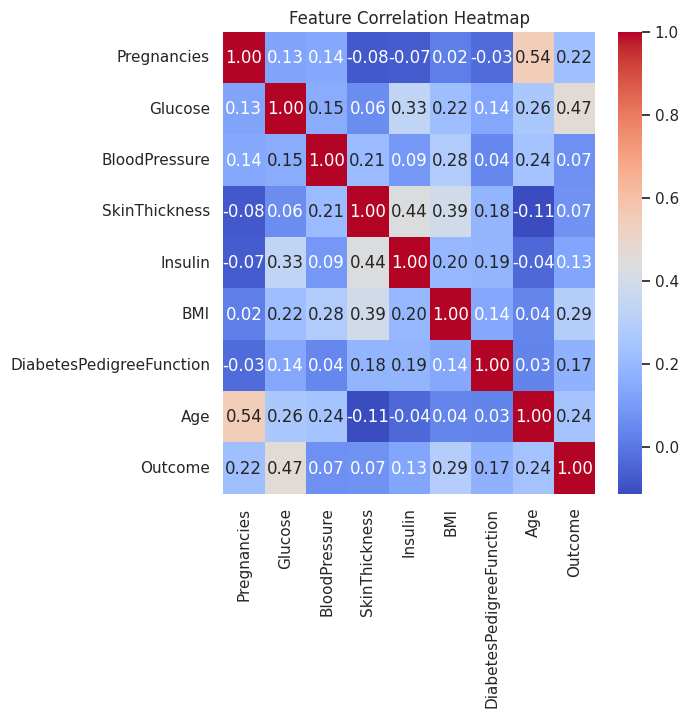

In [200]:
plt.figure(figsize=(6,6))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


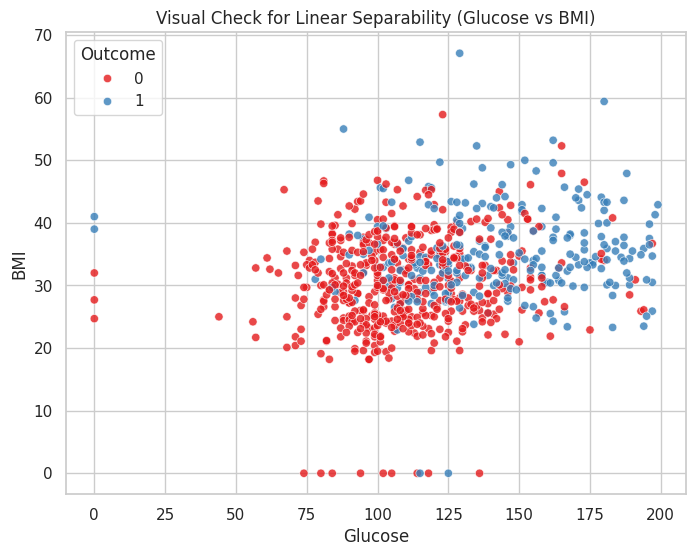

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot of two features
plt.figure(figsize=(8, 6))
sns.scatterplot(data=diabetes_dataset, x='Glucose', y='BMI', hue='Outcome', palette='Set1', alpha=0.8)

plt.title('Visual Check for Linear Separability (Glucose vs BMI)')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.grid(True)
plt.show()


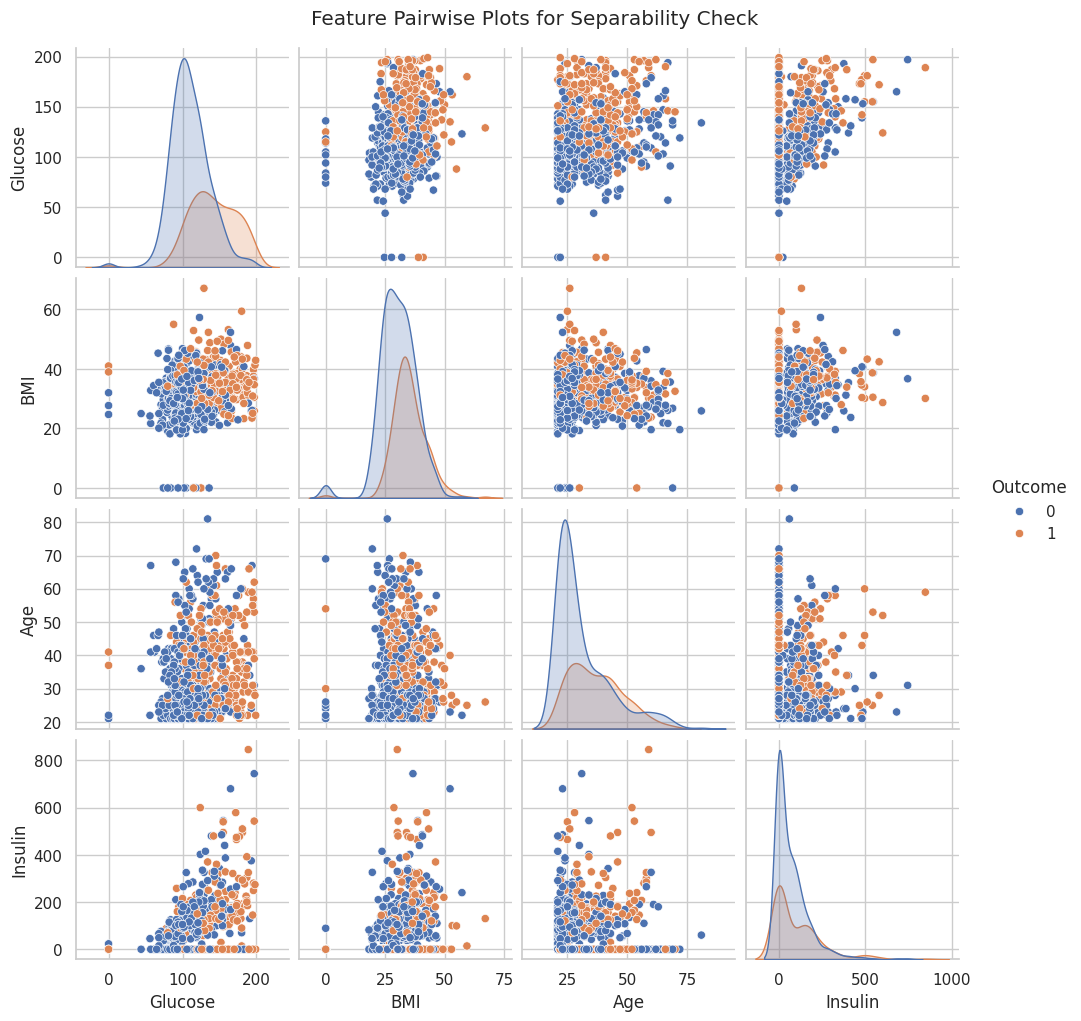

In [202]:
# Try different pairs
sns.pairplot(diabetes_dataset, hue='Outcome', vars=['Glucose', 'BMI', 'Age', 'Insulin'])
plt.suptitle('Feature Pairwise Plots for Separability Check', y=1.02)
plt.show()


spliting the features

In [203]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [204]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [205]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Train-Test Spilit

In [206]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [207]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Data Standardisation

In [208]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [209]:
scaler.fit(X_train)

StandardScaler()

In [210]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [211]:
print(X_train)

[[-1.13796489 -0.07971099 -3.5556072  ...  0.02825037 -0.98159708
  -0.7885233 ]
 [ 0.64067858 -0.52091877  0.02549599 ... -0.17184452 -1.03823795
   0.31879426]
 [-0.84152431  2.12632792 -0.48609018 ... -0.25938604 -0.21545477
   2.19271628]
 ...
 [ 2.12288146 -1.15121561  0.23013046 ... -0.25938604 -0.50760242
   0.14843771]
 [ 0.04779742 -0.30031488  0.43476492 ...  0.90366551 -0.69839272
   0.40397253]
 [-1.13796489 -1.11970076 -0.07682125 ...  0.45345201 -0.69243053
  -0.70334503]]


Training the Model

In [212]:
classifier = svm.SVC(kernel='linear')

In [213]:
#training the support vector Machine Classifier
classifier.fit(X_train, Y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [214]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [215]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7866449511400652


In [216]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [217]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7727272727272727


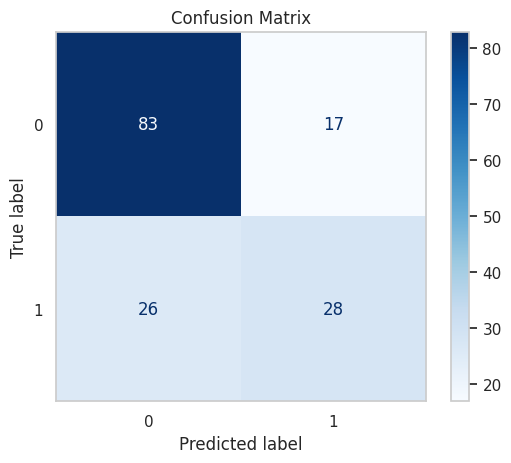

In [228]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# After predicting on test set
Y_pred = model.predict(X_test)

# Generate confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.grid(False)
plt.show()


Making a Predictive Model

In [219]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving the Model

In [220]:
import pickle

In [221]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [222]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [225]:
input_data = (5,116,74,0,0,25.6,0.201,30)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)

prediction = loaded_model.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[0]
The person is not diabetic
